PROJECT --> 01

ROCK vs MINE PREDICTION

In [5]:
#IMPORTING THE LIBRARIES
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn as skl

DATA COLLECTION AND DATA PROCESSING

In [6]:
#loading the dataset to a pandas dataframe
#in our dataframe there is no headings so we mention in the coe header = null
sonar = pd.read_csv('/content/Copy of sonar data.csv', header = None)

In [7]:
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [8]:
#number of rows and columns
sonar.shape

(208, 61)

In [9]:
#describe means statistical measures of the data
sonar.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [10]:
#
sonar[60].value_counts()

,count
60,
M,111
R,97


MORE DATA MORE ACCURACY

M-> MINE

R-> ROCK

In [11]:
sonar.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [12]:
#seperate the data and labels
x = sonar.drop(columns=60, axis=1)
y = sonar[60]

In [13]:
print(x,y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Training and Test Data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, stratify = y, random_state = 1)

in the above statement we mentioned test_size = 0.1 because in the given data we use 10% of data for the test remaining data used to train the data

Stratify = y

this means we need to split the data according to mine and rock in the data we have nearly equal number of rock and minne data so we use the stratify keywor to split the data

random_state

to split the data in a particular order

In [15]:
print(x.shape, x_train.shape, x_test.shape)

(208, 60) (187, 60) (21, 60)


In [16]:
print(y.shape, y_train.shape, y_test.shape)

(208,) (187,) (21,)


In [18]:
print(x_train)
print(y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

now we need to train our machine with the x train data here 187 is used to train the data and 21 is used to test the data

**MODEL TRAINING** --> LOGISTIC REGRESSION

In [17]:
model = LogisticRegression()

In [19]:
#training the logistic regreession model with training data

model.fit(x_train, y_train)

LogisticRegression()

MODEL EVALUATION

In [22]:
#accuracy on the training data
# more data more accuracy
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [23]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8342245989304813


In [25]:
x_test_preiction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_preiction, y_test)

In [26]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7619047619047619


making a predictive system

In [28]:
input_data = (0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['R']
The object is a Rock


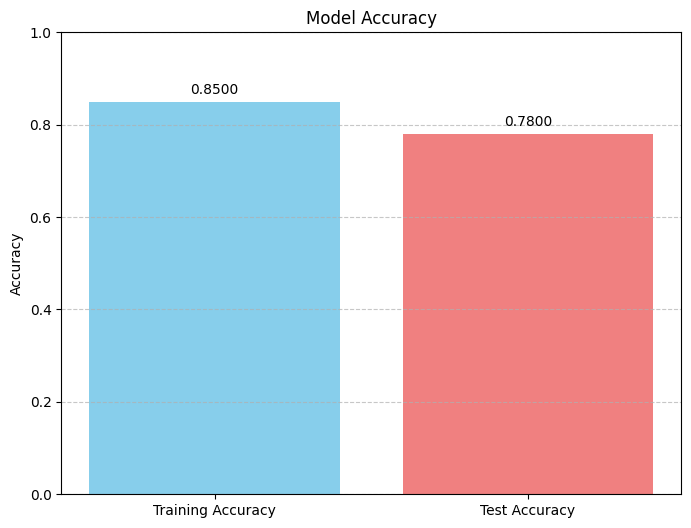

In [31]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
x
# Create a list of accuracy values
accuracy_values = [training_data_accuracy, test_data_accuracy]

# Create corresponding labels for the plot
labels = ['Training Accuracy', 'Test Accuracy']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, accuracy_values, color=['skyblue', 'lightcoral'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Set y-axis limit to 0-1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid

# Add text labels above the bars
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom')

plt.show()